# 데이터 전처리

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/2-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 넘파이로 데이터 준비하기

In [48]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [49]:
import numpy as np

* np.column_stack() 함수와 np.concatenate() 함수의 연결 방식 확인하기 

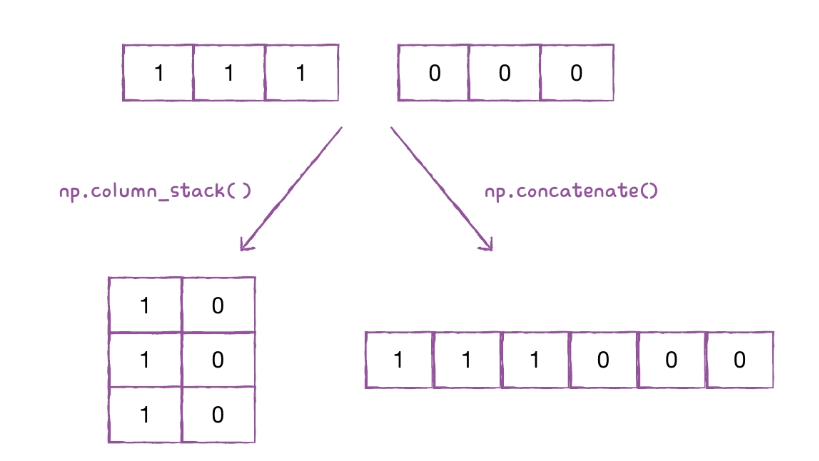

In [3]:
np.column_stack(([1,2,3], [4,5,6]))

array([[1, 4],
       [2, 5],
       [3, 6]])

In [4]:
fish_data = np.column_stack((fish_length, fish_weight))

In [50]:
len(fish_data)

49

In [5]:
print(fish_data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


In [6]:
print(np.ones(5))

[1. 1. 1. 1. 1.]


In [7]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

In [8]:
print(fish_target)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0.]


In [9]:
#  ndim : 몇 차원인가?
fish_target.ndim

1

## 사이킷런으로 훈련 세트와 테스트 세트 나누기

* 사이킷런에서는 머신러닝 모델을 위한 알고리즘뿐만 아니라 다양한 유틸리티 도구도 제공합니다. 
* 대표적인 도구가 바로 train_test_split() 함수입니다. 
* 이 함수는 전달되는 리스트나 배열을 비율에 맞게 훈련 세트와 테스트 세트로 섞어서 나누어 줍니다.

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, random_state=42)

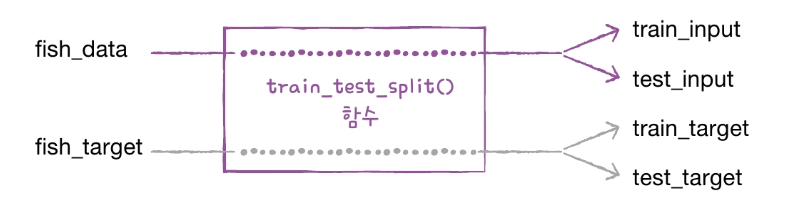

In [12]:
print(train_input.shape, test_input.shape)

(36, 2) (13, 2)


In [13]:
print(train_target.shape, test_target.shape)

(36,) (13,)


In [14]:
print(test_target)

[1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


* 훈련 세트와 테스트 세트에 샘플의 클래스 비율이 일정하지 않다면 모델이 일부 샘플을 올바르게 학습할 수 없습니다. 
* train_test_split() 함수에서는 stratify 매개변수에 타킷 데이터를 전달하면 클래스 비율에 맞게 데이터를 나눕니다. 
* 훈련 데이터가 작거나 특정 클래스의 샘플 개수가 적을 때 특히 유용합니다. 

In [15]:
train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42)

In [16]:
print(test_target)

[0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1.]


## 수상한 도미 한마리

In [17]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

* 도미의 데이터를 입력하여 예측해 보겠습니다. 참고로 도미의 라벨값은 1입니다.

In [18]:
print(kn.predict([[25, 150]]))

[0.]


In [19]:
import matplotlib.pyplot as plt

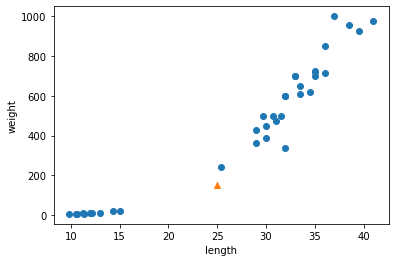

In [20]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 샘플에서 가장 가까운 이웃을 찾아 주는 kneighbors() 메서드가 있습니다. 이 메서드는 이웃까지의 거리와 이웃 샘플의 인덱스를 반환합니다. 
* K-NN의 기본값은 5를 사용했기 때문에 5개를 반환합니다.

In [21]:
distances, indexes = kn.kneighbors([[25, 150]])

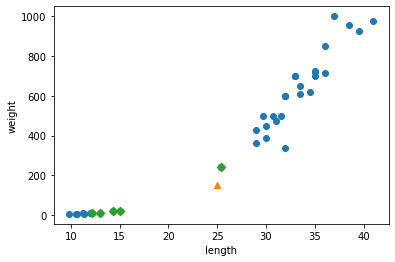

In [22]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [23]:
print(train_input[indexes])

[[[ 25.4 242. ]
  [ 15.   19.9]
  [ 14.3  19.7]
  [ 13.   12.2]
  [ 12.2  12.2]]]


In [24]:
print(train_target[indexes])

[[1. 0. 0. 0. 0.]]


In [25]:
print(distances)

[[ 92.00086956 130.48375378 130.73859415 138.32150953 138.39320793]]


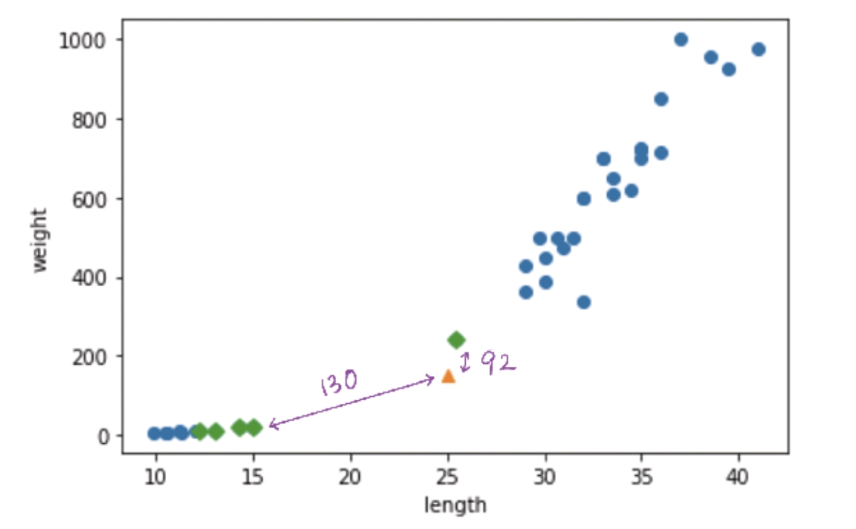

## 기준을 맞춰라

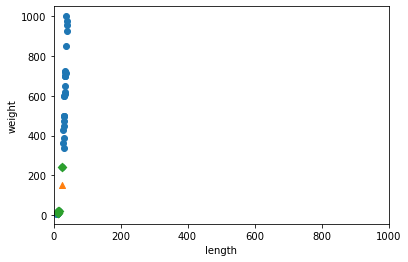

In [26]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes,0], train_input[indexes,1], marker='D')
plt.xlim((0, 1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

* 두 특성(길이와 무게)의 값이 놓인 범위가 매우 다릅니다. 이를 두 특성의 스케일(scale)이 다르다고 말합니다. 
* 특성 간 스케일이 다른 일은 매우 흔합니다. 어떤 사람이 방의 넓이를 재는데 세로는 cm로 가로는 inch로 쟀다면 정사각형 방도 직사각형처럼 보일 것입니다. 
* 데이터를 표현하는 기준이 다르면 알고리즘이 올바르게 예측할 수 없습니다. 알고리즘이 거리 기반일 때 특히 그렇습니다. 
* 샘플 간의 거리에 영향을 많이 받으므로 제대로 사용하려면 특성값을 일정한 기준으로 맞춰 주어야 합니다. 
* 이런 작업을 데이터 전처리(data preprocessing)이라고 부릅니다. 

### 표준점수
* 가장 널리 사용하는 전처리 방법 중 하나는 표준점수(standard score) 입니다.(z-score라고도 부릅니다) 
* 표준점수는 각 특성값이 0에서 표준편차의 몇 배만큼 떨어져 있는지를 나타냅니다. 이를 통해 실제 특성값의 크기와 상관없이 동일한 조건으로 비교할수 있습니다. 

In [27]:
mean = np.mean(train_input, axis=0)
std = np.std(train_input, axis=0)

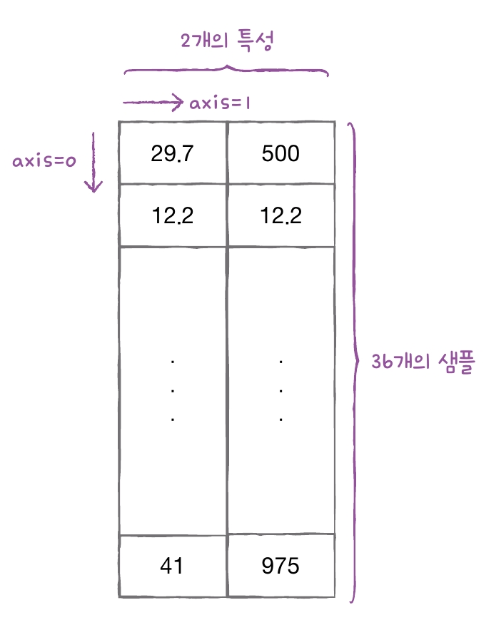

In [52]:
print(mean, std)

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


In [29]:
# 넘파이를 이용했기 때문에 이 수식이 가능하다!
train_scaled = (train_input - mean) / std

In [30]:
train_scaled

array([[ 0.24070039,  0.14198246],
       [-1.51237757, -1.36683783],
       [ 0.5712808 ,  0.76060496],
       [-1.60253587, -1.37766373],
       [ 1.22242404,  1.45655528],
       [ 0.17057727, -0.07453542],
       [ 0.87180845,  0.80390854],
       [ 0.87180845,  1.22457184],
       [ 0.37092904,  0.06465464],
       [ 0.77163257,  0.82246721],
       [ 0.97198434,  1.68853872],
       [-1.61255346, -1.3742613 ],
       [ 0.72154463,  0.51315596],
       [-1.53241275, -1.3742613 ],
       [ 0.17057727, -0.28177396],
       [ 0.5712808 ,  0.76060496],
       [ 0.34087627,  0.14198246],
       [ 1.12224816,  1.54934866],
       [ 0.62136874,  0.60594934],
       [-1.30200822, -1.34363949],
       [ 0.42101698,  0.14198246],
       [-0.19005591, -0.65604058],
       [-1.75279969, -1.38384995],
       [ 0.47110492,  0.45129371],
       [-1.68267658, -1.38137546],
       [ 0.62136874,  0.48222484],
       [-1.67265899, -1.38292202],
       [ 0.77163257,  0.76060496],
       [ 0.47110492,

In [32]:
# 소수점을 제거해버리면 오류가 일어날 수 있기 때문에 python에서는 이렇게 표기한다
train_scaled[:,0].mean() # 0과 동일

4.996003610813204e-16

In [35]:
train_scaled[:,0].std()

1.0

In [33]:
# 0.3 이 아니라 0.3000~4로 표현한다
0.1+0.2

0.30000000000000004

## 전처리 데이터로 모델 훈련하기

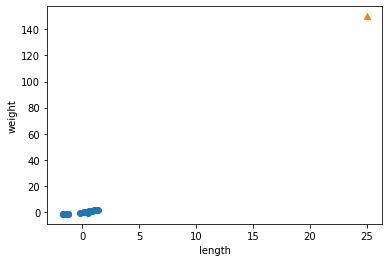

In [36]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(25, 150, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
# 새로운 데이터에도 스케일링을 한 뒤 plot 해야한다
new = ([25, 150] - mean) / std

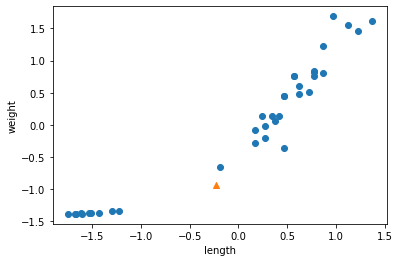

In [40]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()
# 동일한 범위 내에 있기 때문에 제대로 plot 된 것을 볼 수 있다

In [41]:
# 새롭게 훈련시키기 : train_scaled 된 그대로, y값(train_target)은 스케일링 하면 x
# fit = 훈련시킨다
kn.fit(train_scaled, train_target)

KNeighborsClassifier()

* 훈련을 마치고 테스트 세트로 평가할 때 주의해야 합니다. 
* 테스트 세트도 훈련 세트의 평균과 표준편차로 변환해야 합니다. 그렇지 않으면 데이터의 스케일이 같아지지 않으므로 훈련한 모델이 쓸모없게 됩니다. 

### test 데이터를 스케일링 할 때, train의 mean, std를 사용한다!!

In [42]:
# test 데이터도 스케일링 해야한다 
# mean, std는 train 데이터로 계산된 값으로 사용한다
test_scaled = (test_input - mean) / std

In [43]:
test_scaled

array([[-1.63258863, -1.37457062],
       [-1.55244793, -1.37395199],
       [ 0.24070039, -0.01267317],
       [-1.55244793, -1.37364268],
       [-0.07986244, -0.35291555],
       [-1.4923424 , -1.3631261 ],
       [ 0.67145669,  0.71420828],
       [ 0.67145669,  0.3739659 ],
       [ 1.12224816,  1.44108972],
       [ 0.77163257,  0.69874271],
       [-0.09989762, -0.50757117],
       [ 0.37092904,  0.14198246],
       [ 1.37268787,  1.5338831 ]])

In [44]:
# score 값이 1.0 = predict 값이 모두 맞았다는 의미이다.
kn.score(test_scaled, test_target)

1.0

In [45]:
print(kn.predict([new]))

[1.]


In [46]:
distances, indexes = kn.kneighbors([new])

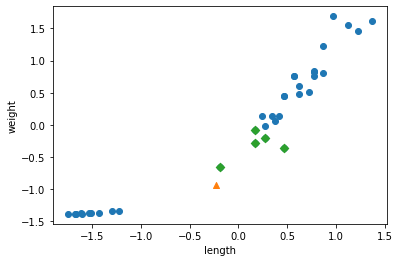

In [47]:
plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes,0], train_scaled[indexes,1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()